# Build an Artificial Neural Network
## Classifying Dates
In this project, we will build a neural network to classify dates. We'll use the “Date Fruit Dataset” available on Kaggle for this. This dataset includes samples of dates that can be classified into 7 classes according to their types.

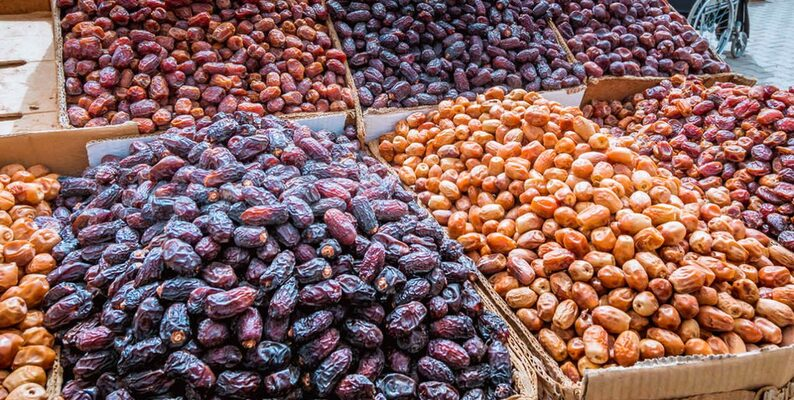

## Importing the required libraries
We'll start with importing required libraries.

📌 Use the keywords "import" and "from".

In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

## Dataset
Let's load the .xlsx file.

In [4]:
# Read the "date_fruit.xlsx" file
data = pd.read_excel("date_fruit.xlsx")

Next, we take a look at the dataset.

In [5]:
# Use the head() function to display the first 5 rows of the data
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [6]:
# Print the shape of the data and classes
print(data.shape)
print(data["Class"].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


## Preprocessing

Now that we have a better understanding of our data, let’s split the dataset into features and labels.

📌 Create X and y datasets 

In [7]:
# Create the features dataset
X = data.drop("Class", axis=1)

# Create the labels dataset
y = data.loc[:, "Class"]

### Feature scaling

Having features in different units or ranges can be problematic in deep learning. We need to scale all of the values between the 0 and 1 range.


In [8]:
# Normalize the features dataset and assign it to a variable
X_scaled = minmax_scale(X)

# Create a DataFrame using the new variable
X = pd.DataFrame(X_scaled)

Then, we print the X data again so we can see the difference.

In [9]:
# Print the newly created DataFrame
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


Our features are ready for training. Now, it's time to prepare the labels.

📌 Print y to take a look at it.

In [10]:
# Print the y array
y

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI
...,...
893,SOGAY
894,SOGAY
895,SOGAY
896,SOGAY


Artificial intelligence algorithms can't use string data when training a model because no mathematical operations can be performed on them.

📌 Use the LabelEncoder of the sklearn library to converting strings to integers.

In [11]:
# Create an LabelEncoder object.
encoder = LabelEncoder()

# Convert string classes to integers using fit_transform() method
y = encoder.fit_transform(y)

Then, we print y to check the result.

In [12]:
# Print the y array
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Splitting

Great, that worked out as we wanted it. Now, we split the dataset into training, validation and test datasets. In general, the ratio for splitting is 80% for training, 10% for validation and 10% for test sets.


In [13]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

Let's print the total length of the initial dataset and lengths of the newly created datasets to check our results.

In [14]:
# Print the lengths of the X, X_train, X_val and X_test
print(f"Lenght of dataset: {len(X)}")
print(f"Lenght of training dataset: {len(X_train)}")
print(f"Lenght of validation dataset: {len(X_val)}")
print(f"Lenght of test dataset: {len(X_test)}")

Lenght of dataset: 898
Lenght of training dataset: 718
Lenght of validation dataset: 90
Lenght of test dataset: 90


## Constructing the neural network
And with that, our data is ready to be used in a model. We can move on to the exciting part: constructing a deep learning model. We’ll use TensorFlow for this. To speed up the training time, activate the GPU of Google Colab.

In [16]:
# Import TensorFlow
import tensorflow as tf

Let's start by creating a model object using Sequential API of Keras.

In [17]:
# Create a model object
model = tf.keras.Sequential()

### Input layer
First, we construct an input layer and assign it to a variable. The first argument is the number of nodes we want in that hidden layer. Only for the input layer, we have to set the input_shape argument which is the number of columns, in this case, 34. For the activation function, we specify “ReLU”.

In [18]:
# Create an input layer
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation="relu")

# Add input layer to model object
model.add(input_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Hidden layers
Next, we need to add the hidden layers. We'll add 4 hidden layers each with 4096 nodes. Again, we specify ReLU as the activation functions and 0.5 dropouts.


In [19]:
# Add the first hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation="relu"))
# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the second hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation="relu"))
# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the third hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation="relu"))
# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the fourth hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation="relu"))
# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

### Output layer
As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 7 in our case. We'll use the softmax activation function in the output layer.

In [20]:
# Add the output layer
model.add(tf.keras.layers.Dense(7, activation="softmax"))

### Optimizer
Now we have the structure of our model. To configure the model for training, we'll use the *.compile()* method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Sparse Categorical Crossentropy" for the loss function

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

In [26]:
# Train the model for 100 epochs
results = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.2961 - loss: 1.9853 - val_accuracy: 0.6222 - val_loss: 1.1966
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6642 - loss: 0.9493 - val_accuracy: 0.7556 - val_loss: 0.6245
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7231 - loss: 0.7073 - val_accuracy: 0.7444 - val_loss: 0.6728
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7524 - loss: 0.6188 - val_accuracy: 0.8000 - val_loss: 0.4969
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7833 - loss: 0.5548 - val_accuracy: 0.8778 - val_loss: 0.3653
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7660 - loss: 0.5469 - val_accuracy: 0.8556 - val_loss: 0.3618
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7915 - loss: 0.4911 - val_accuracy: 0.8333 - val_loss: 0.3857
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7893 - loss: 0.4850 - val_accuracy: 

### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

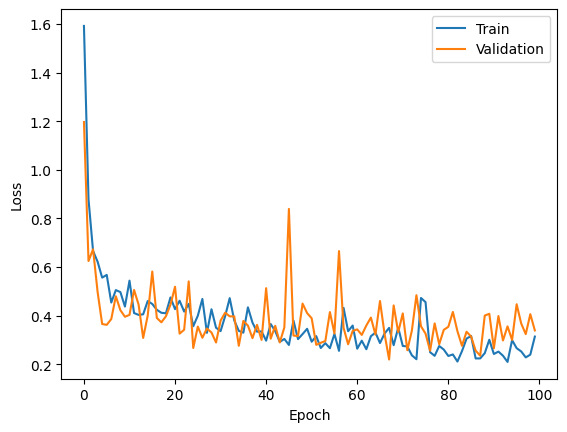

In [27]:
# Plot the the training loss
plt.plot(results.history["loss"], label="Train")
# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

## Performance evaluation

Finally, we are going to use the test dataset we created to evaluate the performance of the model.

In [28]:
# Evaluate the performance
test_results = model.test_on_batch(X_test, y_test)

# Print the result
print(test_results)

[array(0.29013905, dtype=float32), array(0.9166667, dtype=float32)]
